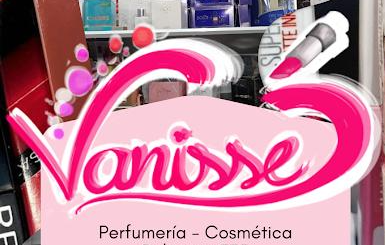

En este notebook se realizará un preprocesamiento exhaustivo de los datos de ventas recolectados durante el mes de arbil y mayo con el objetivo de prepararlos para su uso en Power BI. La limpieza de datos, el recorte de nombres de productos, la conversión de valores numéricos y el cálculo del precio final darán como resultado un conjunto de datos de mayor integridad que facilitará el proceso de visualización y el análisis de las ventas.

El dataset contiene la siguiente información detallada sobre las ventas, incluyendo datos sobre los clientes, productos, métodos de pago y precios:

- **n_cliente**: número de identificación de cada visita al local que realiza una compra. Este número permite rastrear las compras realizadas por cada persona y analizar el comportamiento de compra.

- **fecha_y_hora**: fecha y hora de la compra. Registra el momento exacto en que se realizó la transacción. Esta información es útil para análisis temporales, como identificar patrones de compra en diferentes momentos del día, días de la semana o épocas del año.

- **nombre_producto**: descripción textual del producto adquirido. Facilita la identificación del producto y permite realizar análisis sobre la popularidad de distintos productos.

- **metodo_pago**: método de pago utilizado para la compra. Especifica cómo se realizó el pago, por ejemplo, efectivo, tarjeta de crédito, tarjeta de débito, QR, etc. Esta información es importante para entender las preferencias de pago de los clientes.

- **codigo_barras**: identificador único del producto que puede ser escaneado para agilizar el proceso de venta y registro.

- **precio_contado**: precio del producto si se paga al contado.

- **precio_lista**: precio del producto si se paga mediante débito, crédito o QR.

- **total_compra_efectivo**: es la suma total de los precios de los productos adquiridos en una transacción específica cuando el pago se realiza en efectivo.

- **total_compra_lista**:  es la suma total de los precios de los productos de la compra si se paga  mediante débito, crédito o QR.

- **3_pagos**: costo del producto cuando el pago se fracciona en tres pagos.

- **marca**: nmbre del fabricante o la marca del producto. Ayuda en el análisis de la preferencia de marca y en la gestión de inventarios de productos de distintas marcas.

- **categoria**: clasificación del producto en una categoría específica, como alimentos, bebidas, electrónica, etc. Esta clasificación es útil para análisis de ventas por categoría y para la organización de productos en el punto de venta.



Comenzaremos importando las librerías necesarias, importando los datos y renombrando las columnas asignando los nombres mencionados anteriormente para mejorar la legibilidad y consistencia del Dataframe.

In [ ]:
import pandas as pd

ventas = pd.read_csv("Registro Ventas-Grid view (3).csv")
print(ventas.info())

ventas.columns = ["n_cliente", "fecha_y_hora", "nombre_producto", "metodo_pago", "codigo_barras", "precio_contado", "precio_lista", "total_compra_efectivo", "total_compra_lista", "3_pagos", "marca", "categoria"]
ventas.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   N° Pedido                          232 non-null    int64 
 1   Notes                              232 non-null    object
 2   Lista Nippon                       232 non-null    object
 3   Seleccionar                        222 non-null    object
 4   Código barras (from Lista Nippon)  232 non-null    object
 5   CONTADO (from Lista Nippon)        232 non-null    object
 6   LISTA  (from Lista Nippon)         232 non-null    object
 7   Total Efectivo                     232 non-null    object
 8   Total Lista                        232 non-null    object
 9   3 PAGOS (from Lista Nippon)        232 non-null    object
 10  Marca (de Lista Nippon)            205 non-null    object
 11  Categoría (de Lista Nippon)        172 non-null    object
dtypes: int64

,n_cliente,fecha_y_hora,nombre_producto,metodo_pago,codigo_barras,precio_contado,precio_lista,total_compra_efectivo,total_compra_lista,3_pagos,marca,categoria
0,1,2024-04-20 17:37,ALA CAMELLITO A MANO (DOY) 450 ml. 450 ---7791...,NaN,7791290795259,$1782,$1904,$1781.59,$1904.45,$2027,Ala,Jabon Ropa
1,10,2024-04-20 18:57,MB. BASE FITme MATTE(VIDRIO) 102 102 ---4155...,NaN,41554538311,$21467,$22947,$21466.55,$22947.01,$24427,Maybelline,NaN
2,12,2024-04-21 00:06,VOGUE BASE LIQ.MateNAT ARENA ARENA ---7509...,NaN,7509552847253,$10761,$11503,$10761.09,$11503.23,$12245,Vogue,NaN
3,13,2024-04-21 00:06,CUTEX QUITAESM.EXPERTO REMOV 100 ml. 1 ---7790...,NaN,7790416012591,$2457,$2627,$2457.43,$2626.91,$2796,Cutex,QUITAESMALTE
4,14,2024-04-22 11:16,CIEL MAGIC EDP vap. x 50 ml. 50 ml. ---7791...,NaN,"7791600295028, 7791293050355, 7509552847253","$12687, $4712, $10761","$13562, $5037, $11503",$28161.03,$30103.17,"$14437, $5362, $12245","Ciel,Dove,Vogue",ACONDICIONADORES
5,15,2024-04-22 11:17,COLORSILK BeauCOL.KERAT.KIT 10 10 ---3099...,débito,309978695103,$5986,$6399,$5985.86,$6398.68,$6811,Colorsilk,TINTURAS
6,16,2024-04-22 11:17,VOGUE BASE LIQ.RESIST AVELLANA AVELL ---7509...,efectivo,7509552828467,$12229,$13073,$12229.49,$13072.90,$13916,Vogue,NaN
7,18,2024-04-22 16:59,VOGUE BASE LIQ.MateNAT ARENA ARENA ---7509...,alias (billetera virtual),7509552847253,$10761,$11503,$10761.09,$11503.23,$12245,Vogue,NaN
8,19,2024-04-22 17:00,COLORAMA ESM.AmorPROPIO PODER PODER ---7899...,débito,7899706221702,$3678,$3931,$3677.85,$3931.50,$4185,Colorama,ESMALTES
9,20,2024-04-22 17:03,COLORAMA ESM.AmorPROPIO ORGULLO ORGU ---7899...,débito,7899706221825,$3678,$3931,$3677.85,$3931.50,$4185,Colorama,ESMALTES


 Para poder manipular eficazmente los datos, utilizaremos el método df.explode sobre las columnas compartidas por varios productos con el objetivo de obtener una fila por producto. Este método divide la lista en filas individuales, duplicando las otras columnas según sea necesario para mantener la coherencia de los datos.

Debido a la falta de datos sobre marca y categoría en algunos productos, se optará por descartar esta información para las órdenes que contengan al menos un producto sin dato de marca o categoría. Esta decisión implica una pérdida de información como costo de mantener la integridad de los datos.




Además, recortaremos los datos de la columna "nombre_producto" para obtener sólo el nombre de cada producto favoreciendo la claridad de los datos, con la función definida a continuación.

In [ ]:
def recortar_nombre(string, char):
    for i in range(len(string)):
      if string[i]== char:
        return string[0:i]


In [ ]:
columnas_compartidas = ["nombre_producto", "codigo_barras" , "precio_contado", "precio_lista", "3_pagos", "marca", "categoria"]
ventas[columnas_compartidas] = ventas[columnas_compartidas].apply(lambda x: list(x.str.split(",")))


# Limpiar filas donde no se han registrado todas las marcas o categorías
for idx, row in ventas.iterrows():

    n_productos = len(row["nombre_producto"])

    if isinstance(row["marca"], list):
        if n_productos != len(row["marca"]):
            ventas.at[idx, "marca"] = [None] * n_productos
    else:
        ventas.at[idx, "marca"] = [None] * n_productos

    if isinstance(row["categoria"], list):
        if n_productos != len(row["categoria"]):
            ventas.at[idx, "categoria"] = [None] * n_productos
    else:
        ventas.at[idx, "categoria"] = [None] * n_productos


ventas_exploded = ventas.explode(columnas_compartidas)
ventas_exploded["nombre_producto"] = ventas_exploded["nombre_producto"].apply(lambda x: recortar_nombre(x, "-"))

In [ ]:
columnas_numericas = ["precio_contado", "precio_lista", "total_compra_efectivo", "total_compra_lista", "3_pagos"]
ventas_exploded[columnas_numericas]= ventas_exploded[columnas_numericas].apply(lambda x: x.str.replace(" ", "").str.replace("$", "").astype(float))


A continuación se creará una nueva columna "precio_final" que contenga el precio que se le cobró al cliente según cuál haya sido su método de pago.

In [ ]:
ventas_exploded["precio_final"] = ventas_exploded.apply(
    lambda row: row['precio_lista'] if pd.isna(row['metodo_pago']) or row['metodo_pago'] in ["QR", "débito", "crédito"] else row['precio_contado'],
    axis=1
)

Ejecutar la siguiente celda para visualizar el resultado final:

In [ ]:
ventas_exploded

,n_cliente,fecha_y_hora,nombre_producto,metodo_pago,codigo_barras,precio_contado,precio_lista,total_compra_efectivo,total_compra_lista,3_pagos,marca,categoria,precio_final
0,1,2024-04-20 17:37,ALA CAMELLITO A MANO (DOY) 450 ml. 450,NaN,7791290795259,1782.0,1904.0,1781.59,1904.45,2027.0,Ala,Jabon Ropa,1904.0
1,10,2024-04-20 18:57,MB. BASE FITme MATTE(VIDRIO) 102 102,NaN,41554538311,21467.0,22947.0,21466.55,22947.01,24427.0,Maybelline,None,22947.0
2,12,2024-04-21 00:06,VOGUE BASE LIQ.MateNAT ARENA ARENA,NaN,7509552847253,10761.0,11503.0,10761.09,11503.23,12245.0,Vogue,None,11503.0
3,13,2024-04-21 00:06,CUTEX QUITAESM.EXPERTO REMOV 100 ml. 1,NaN,7790416012591,2457.0,2627.0,2457.43,2626.91,2796.0,Cutex,QUITAESMALTE,2627.0
4,14,2024-04-22 11:16,CIEL MAGIC EDP vap. x 50 ml. 50 ml.,NaN,7791600295028,12687.0,13562.0,28161.03,30103.17,14437.0,Ciel,None,13562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,243,2024-05-18 13:36,NIVEA CREME LATA x 60 ml. 60 ml.,QR,4005800137679,2886.0,3085.0,2886.18,3085.23,3284.0,Nivea,CREMAS/PRODUCTOS FACIALES,3085.0
228,244,2024-05-18 13:36,NIVEA CREME LATA x 150 ml. 150 ml.,QR,4005800137556,5062.0,5412.0,5062.40,5411.53,5761.0,Nivea,CREMAS/PRODUCTOS FACIALES,5412.0
229,245,2024-05-18 13:36,RML BRILL.OhMyGLOSS!PL 800,débito,3614229612431,12353.0,13205.0,12353.48,13205.44,14057.0,Rimmel,LABIALES,13205.0
230,246,2024-05-18 13:37,BIFERDIL CH.GEL 1007(POTENC) 400 ml. 4,débito,7791001003529,12403.0,13259.0,12403.17,13258.56,14114.0,Biferdil,SHAMPOO,13259.0


In [ ]:
ventas_exploded.to_excel("Vanisse.xlsx")